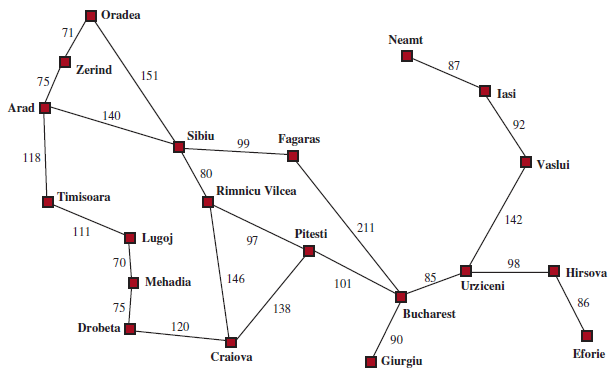

**Figure 3.1** A simplified road map of part of Romania, with road distances in miles.

In [ ]:
romanian_map = {
    'Arad': {'Sibiu':140, 'Zerind':75, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In [ ]:
romanian_map['Zerind']

{'Arad': 75, 'Oradea': 71}

In [ ]:
list(romanian_map['Arad'].keys())

['Sibiu', 'Zerind', 'Timisoara']

In [ ]:
romanian_map['Arad']['Zerind']

75

In [ ]:
romanian_map['Zerind']['Arad']

75

# BFS

<p style="text-align: justify">Reached is a set of states which has been generated, because once we’ve reached a state, we can never find a better path to the state. That also means we can do an early goal test, checking whether a node is a solution as soon as it is generated, rather than the late goal test that best-first search uses, waiting until a node is popped off the queue.</p>

In [ ]:
def bfs(start, goal, G):
    generated= [start] # to store the order of nodes generated
    frontier = [{'Name':start,'Path cost':0, 'Path':[start]}]

    while len(frontier) > 0:
        print('***Frontier', end=': ')
        for node in frontier: print(node['Name'], end = ' - ')
        unode  = frontier.pop(0)     # selceting the node to expand
        u = unode['Name']

        print('***')
        print("Expanding: "+u)

        # expand u
        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            if v not in generated: # process if v is not expanded yet
                generated.append(v)
                print(v+" generated.")
                cost = unode['Path cost'] + G[u][v]
                path =  unode['Path']+ [v]
                vnode = {'Name': v,'Path cost': cost,'Path': path}
                # goal test
                if v == goal:
                    print('Goal test satisfied.')
                    return vnode # breaking from while
                frontier.append(vnode)# store the generated node in the frontier

    print('Failed')

In [6]:
bfs('Timisoara', 'Urziceni', romanian_map) # change the soure and destination

***Frontier: Timisoara - ***
Expanding: Timisoara
Arad generated.
Lugoj generated.
***Frontier: Arad - Lugoj - ***
Expanding: Arad
Sibiu generated.
Zerind generated.
***Frontier: Lugoj - Sibiu - Zerind - ***
Expanding: Lugoj
Mehadia generated.
***Frontier: Sibiu - Zerind - Mehadia - ***
Expanding: Sibiu
Oradea generated.
Fagaras generated.
Rimnicu generated.
***Frontier: Zerind - Mehadia - Oradea - Fagaras - Rimnicu - ***
Expanding: Zerind
***Frontier: Mehadia - Oradea - Fagaras - Rimnicu - ***
Expanding: Mehadia
Drobeta generated.
***Frontier: Oradea - Fagaras - Rimnicu - Drobeta - ***
Expanding: Oradea
***Frontier: Fagaras - Rimnicu - Drobeta - ***
Expanding: Fagaras
Bucharest generated.
***Frontier: Rimnicu - Drobeta - Bucharest - ***
Expanding: Rimnicu
Craiova generated.
Pitesti generated.
***Frontier: Drobeta - Bucharest - Craiova - Pitesti - ***
Expanding: Drobeta
***Frontier: Bucharest - Craiova - Pitesti - ***
Expanding: Bucharest
Giurgiu generated.
Urziceni generated.
['Timiso

{'Name': 'Urziceni',
 'Path cost': 653,
 'Path': ['Timisoara', 'Arad', 'Sibiu', 'Fagaras', 'Bucharest', 'Urziceni']}

Based on the above BFS simulation, draw the search tree on paper and insert the image in this cell. (Double Click to edit this cell)
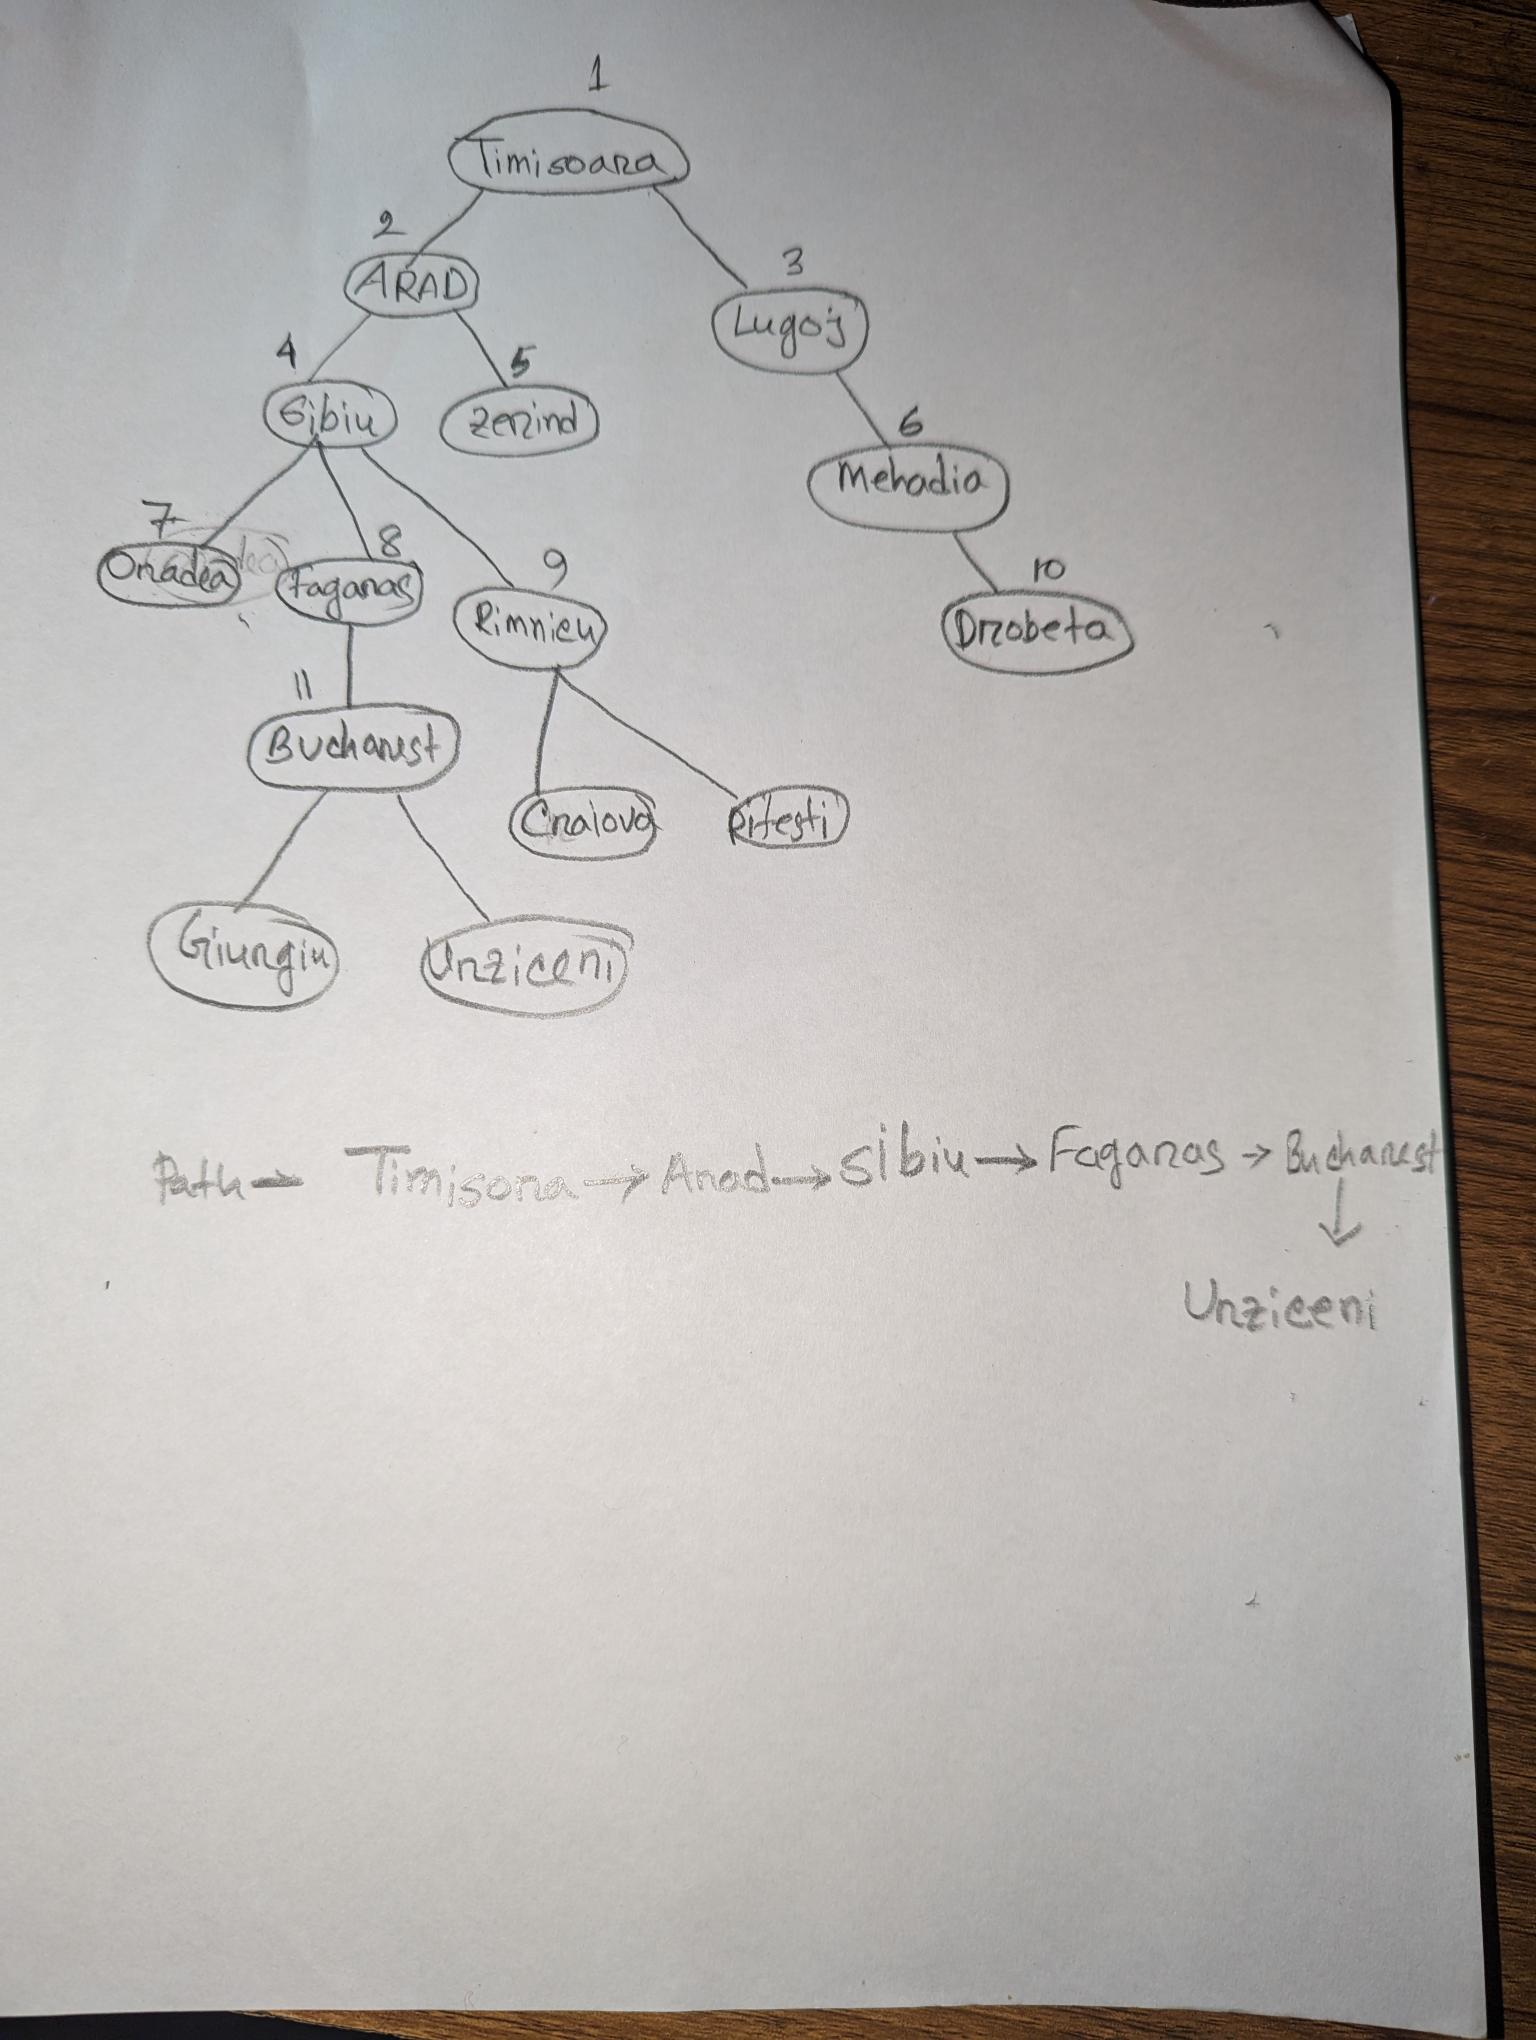

# DFS
Implement DFS using stack,
Implement stack using list (append and pop)

In [10]:
# code DFS here
romanian_map = {
    'Arad': {'Sibiu':140, 'Zerind':75, 'Timisoara':118},
    'Zerind': {'Arad':75, 'Oradea':71},
    'Oradea': {'Zerind':71, 'Sibiu': 151},
    'Sibiu': {'Arad':140, 'Oradea':151, 'Fagaras':99, 'Rimnicu':80},
    'Timisoara': {'Arad': 118, 'Lugoj':111},
    'Lugoj': {'Timisoara':111, 'Mehadia':70},
    'Mehadia': {'Lugoj': 70, 'Drobeta':75},
    'Drobeta': {'Mehadia':75, 'Craiova':120},
    'Craiova': {'Drobeta': 120, 'Rimnicu': 146, 'Pitesti': 138},
    'Rimnicu': {'Sibiu': 80, 'Craiova': 146, 'Pitesti': 97},
    'Fagaras': {'Sibiu':99, 'Bucharest':211},
    'Pitesti': {'Rimnicu': 97, 'Craiova':138, 'Bucharest':101},
    'Bucharest': {'Fagaras':211, 'Pitesti': 101, 'Giurgiu':90, 'Urziceni':85},
    'Giurgiu': {'Bucharest': 90},
    'Urziceni': {'Bucharest': 85, 'Vaslui':142, 'Hirsova':98},
    'Hirsova': {'Urziceni':98, 'Eforie':86},
    'Eforie': {'Hirsova':86},
    'Vaslui': {'Iasi': 92, 'Urziceni':142},
    'Iasi': {'Vaslui':92, 'Neamt': 87},
    'Neamt': {'Iasi':87}
}

In [11]:
def dfs(start, goal, G):
    expanded= [] # to store the order of nodes expanded
    frontier = [{'Name':start,'Path cost':0, 'Path':[start]}]

    while len(frontier) > 0:
        print('***Frontier', end=': ')
        for node in frontier: print(node['Name'], end = ' - ')
        unode  = frontier.pop()     # selceting the node to expand
        u = unode['Name']
        print('***')

        # goal test
        if u == goal:
          print("Goal satisfied")
          return unode # breaking from while

        print("Expanding: "+u)
        expanded.append(u)
        for v in G[u].keys(): # ['Sibiu', 'Zerind', 'Timisoara']
            if v not in expanded: # process if v is not expanded yet
                expanded.append(v)
                print(v+" generated.")
                cost = unode['Path cost'] + G[u][v]
                path =  unode['Path']+ [v]
                vnode = {'Name': v,'Path cost': cost,'Path': path}
                frontier.append(vnode)# store the generated node in the frontier

    print('Failed')


In [13]:
# call DFS here for the Romanian map
dfs('Timisoara', 'Urziceni', romanian_map)

***Frontier: Timisoara - ***
Expanding: Timisoara
Arad generated.
Lugoj generated.
***Frontier: Arad - Lugoj - ***
Expanding: Lugoj
Mehadia generated.
***Frontier: Arad - Mehadia - ***
Expanding: Mehadia
Drobeta generated.
***Frontier: Arad - Drobeta - ***
Expanding: Drobeta
Craiova generated.
***Frontier: Arad - Craiova - ***
Expanding: Craiova
Rimnicu generated.
Pitesti generated.
***Frontier: Arad - Rimnicu - Pitesti - ***
Expanding: Pitesti
Bucharest generated.
***Frontier: Arad - Rimnicu - Bucharest - ***
Expanding: Bucharest
Fagaras generated.
Giurgiu generated.
Urziceni generated.
***Frontier: Arad - Rimnicu - Fagaras - Giurgiu - Urziceni - ***
Goal satisfied


{'Name': 'Urziceni',
 'Path cost': 700,
 'Path': ['Timisoara',
  'Lugoj',
  'Mehadia',
  'Drobeta',
  'Craiova',
  'Pitesti',
  'Bucharest',
  'Urziceni']}

Based on the above DFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)
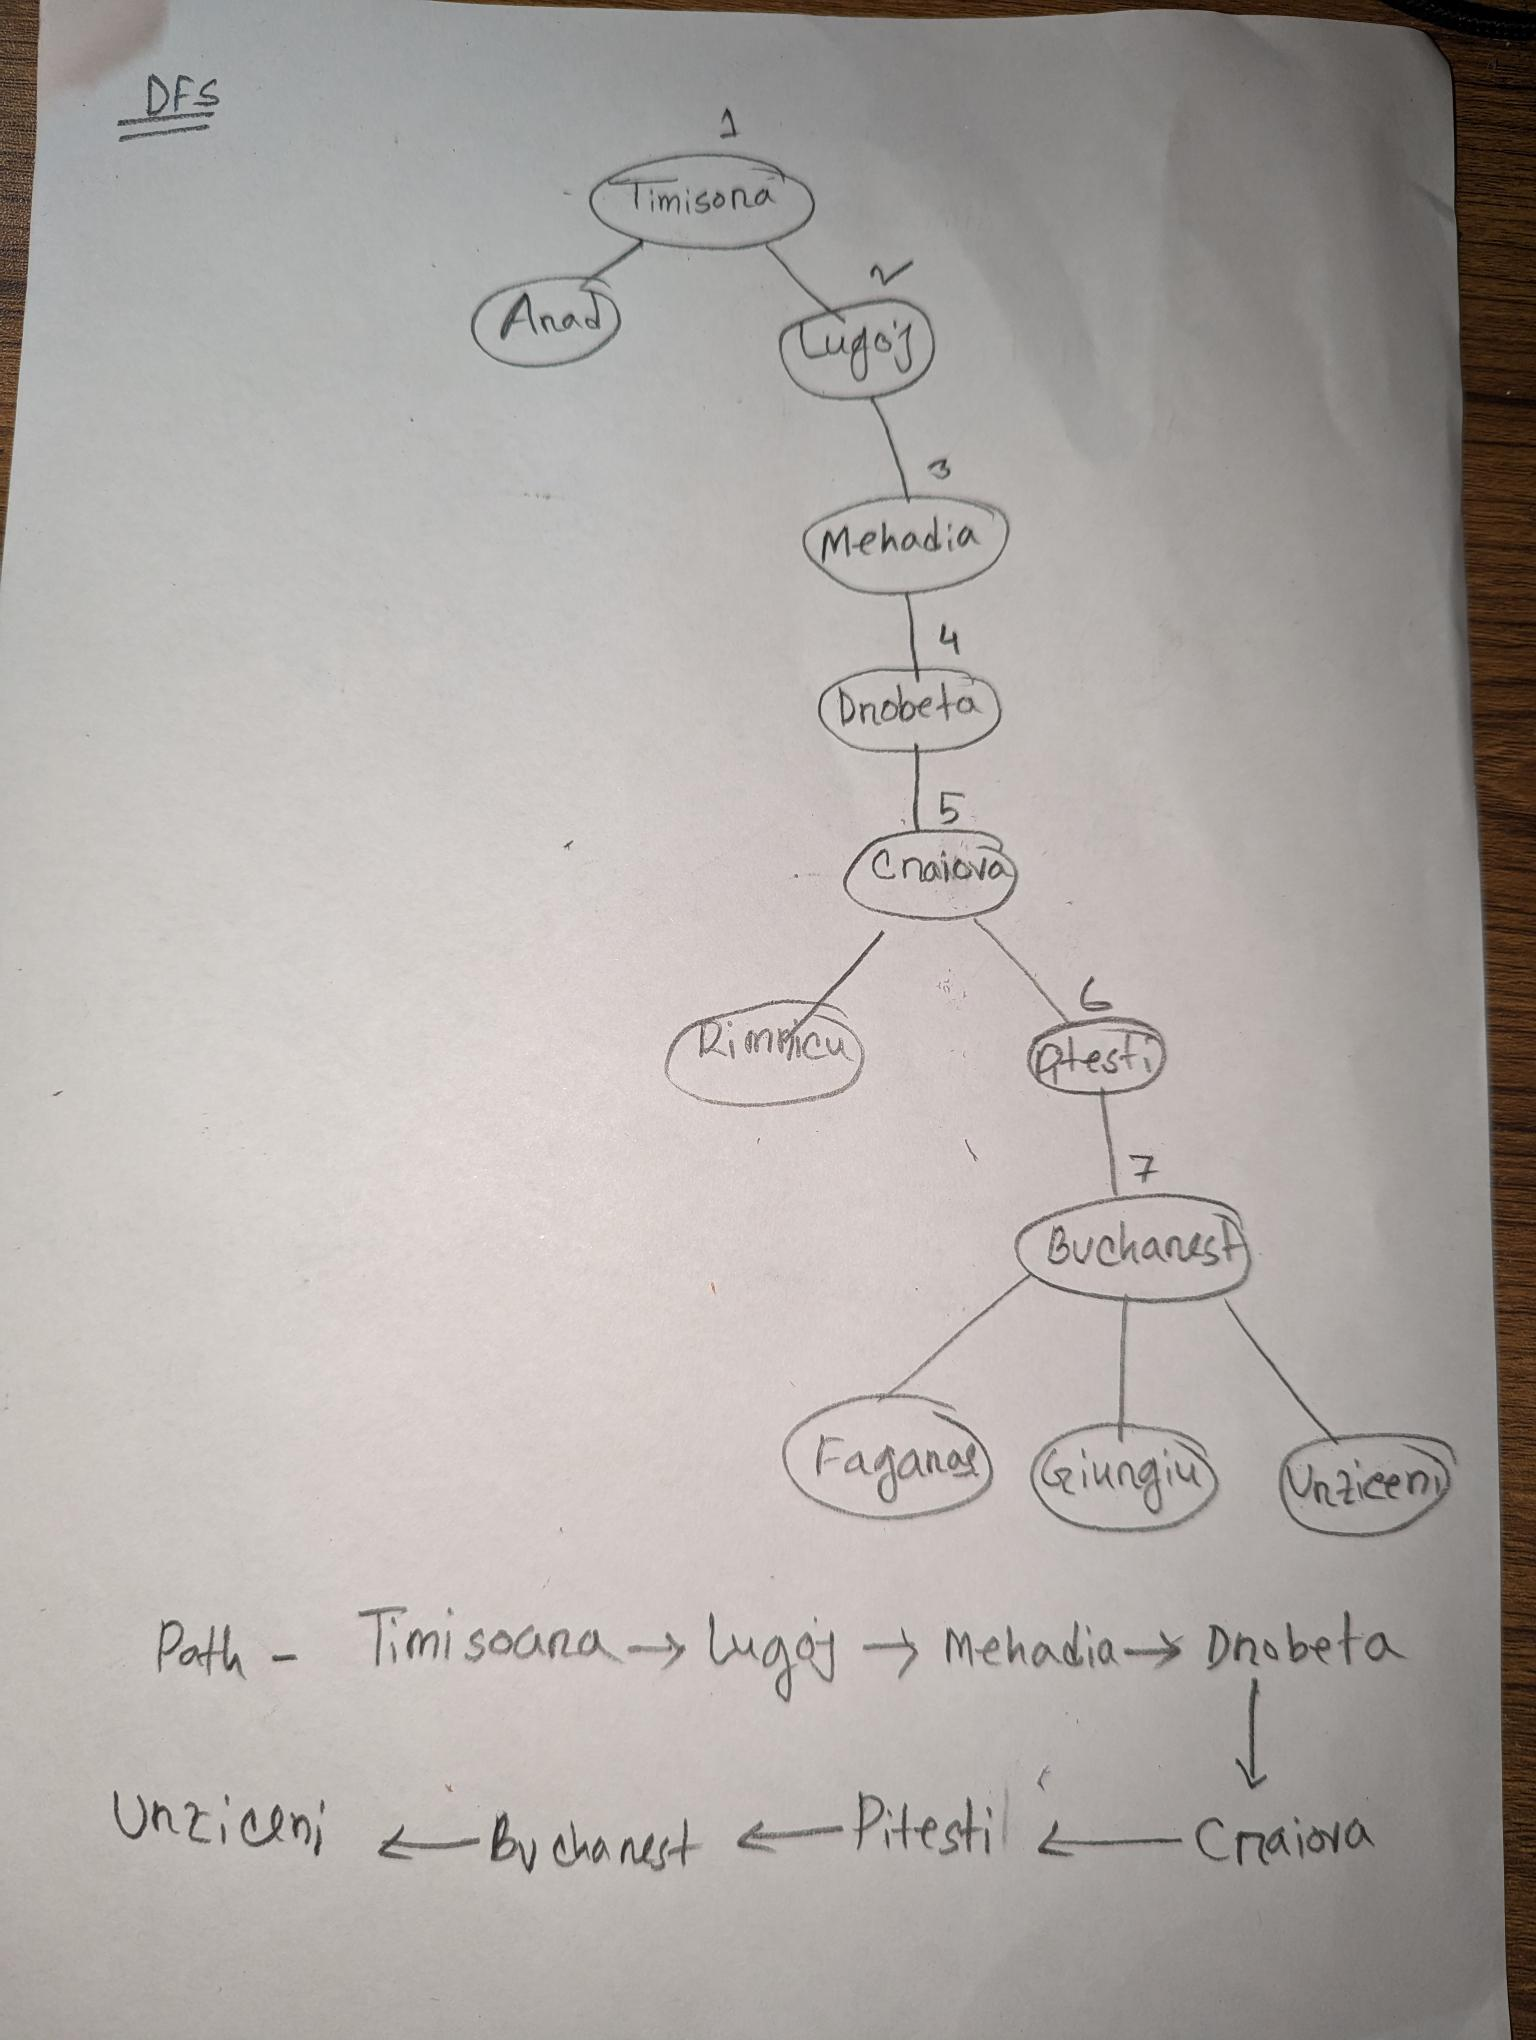

# Another Example

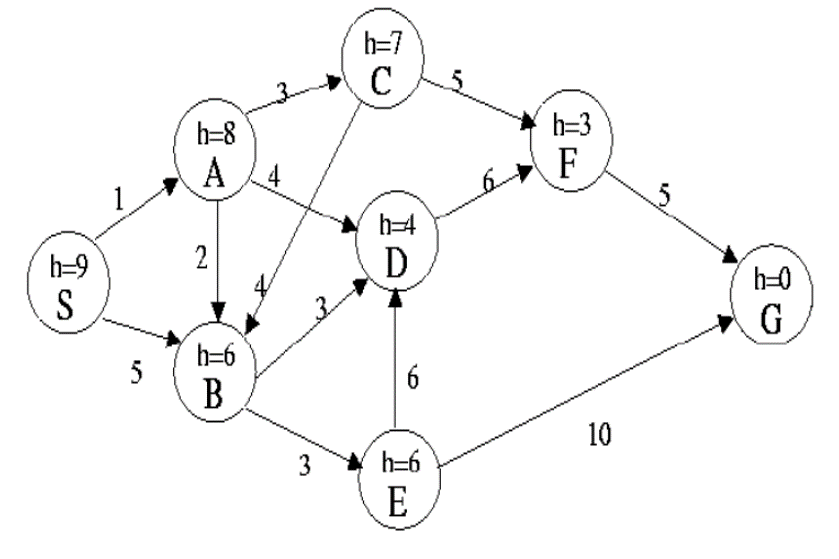

In the above graph the start state is **S**, and the goal state is **G**. The transition costs are next to the edges, and the heuristic estimate, h, of the distance from the state to the goal is in the state’s node.
<br>
Use **BFS** and  **DFS** for this graph.

In [14]:
#map for above graph
map = {
    'A':{'B':2,'C':3, 'D':4},
    'B':{'D':3,'E':3},
    'C':{'B':4,'F':5},
    'D':{'F':6},
    'E':{'D':6,'G':10},
    'F':{'G':5},
    'G':{},
    'S':{'A':1,'B':5}
}

In [15]:
# call BFS here for the above graph
bfs('S', 'G', map)

***Frontier: S - ***
Expanding: S
A generated.
B generated.
***Frontier: A - B - ***
Expanding: A
C generated.
D generated.
***Frontier: B - C - D - ***
Expanding: B
E generated.
***Frontier: C - D - E - ***
Expanding: C
F generated.
***Frontier: D - E - F - ***
Expanding: D
***Frontier: E - F - ***
Expanding: E
G generated.
['S', 'A', 'B', 'C', 'D', 'E', 'F', 'G']


{'Name': 'G', 'Path cost': 18, 'Path': ['S', 'B', 'E', 'G']}

Based on the above BFS simulation, draw the search tree on paper and insert the image in this cell. (**Double Click to edit this cell**)
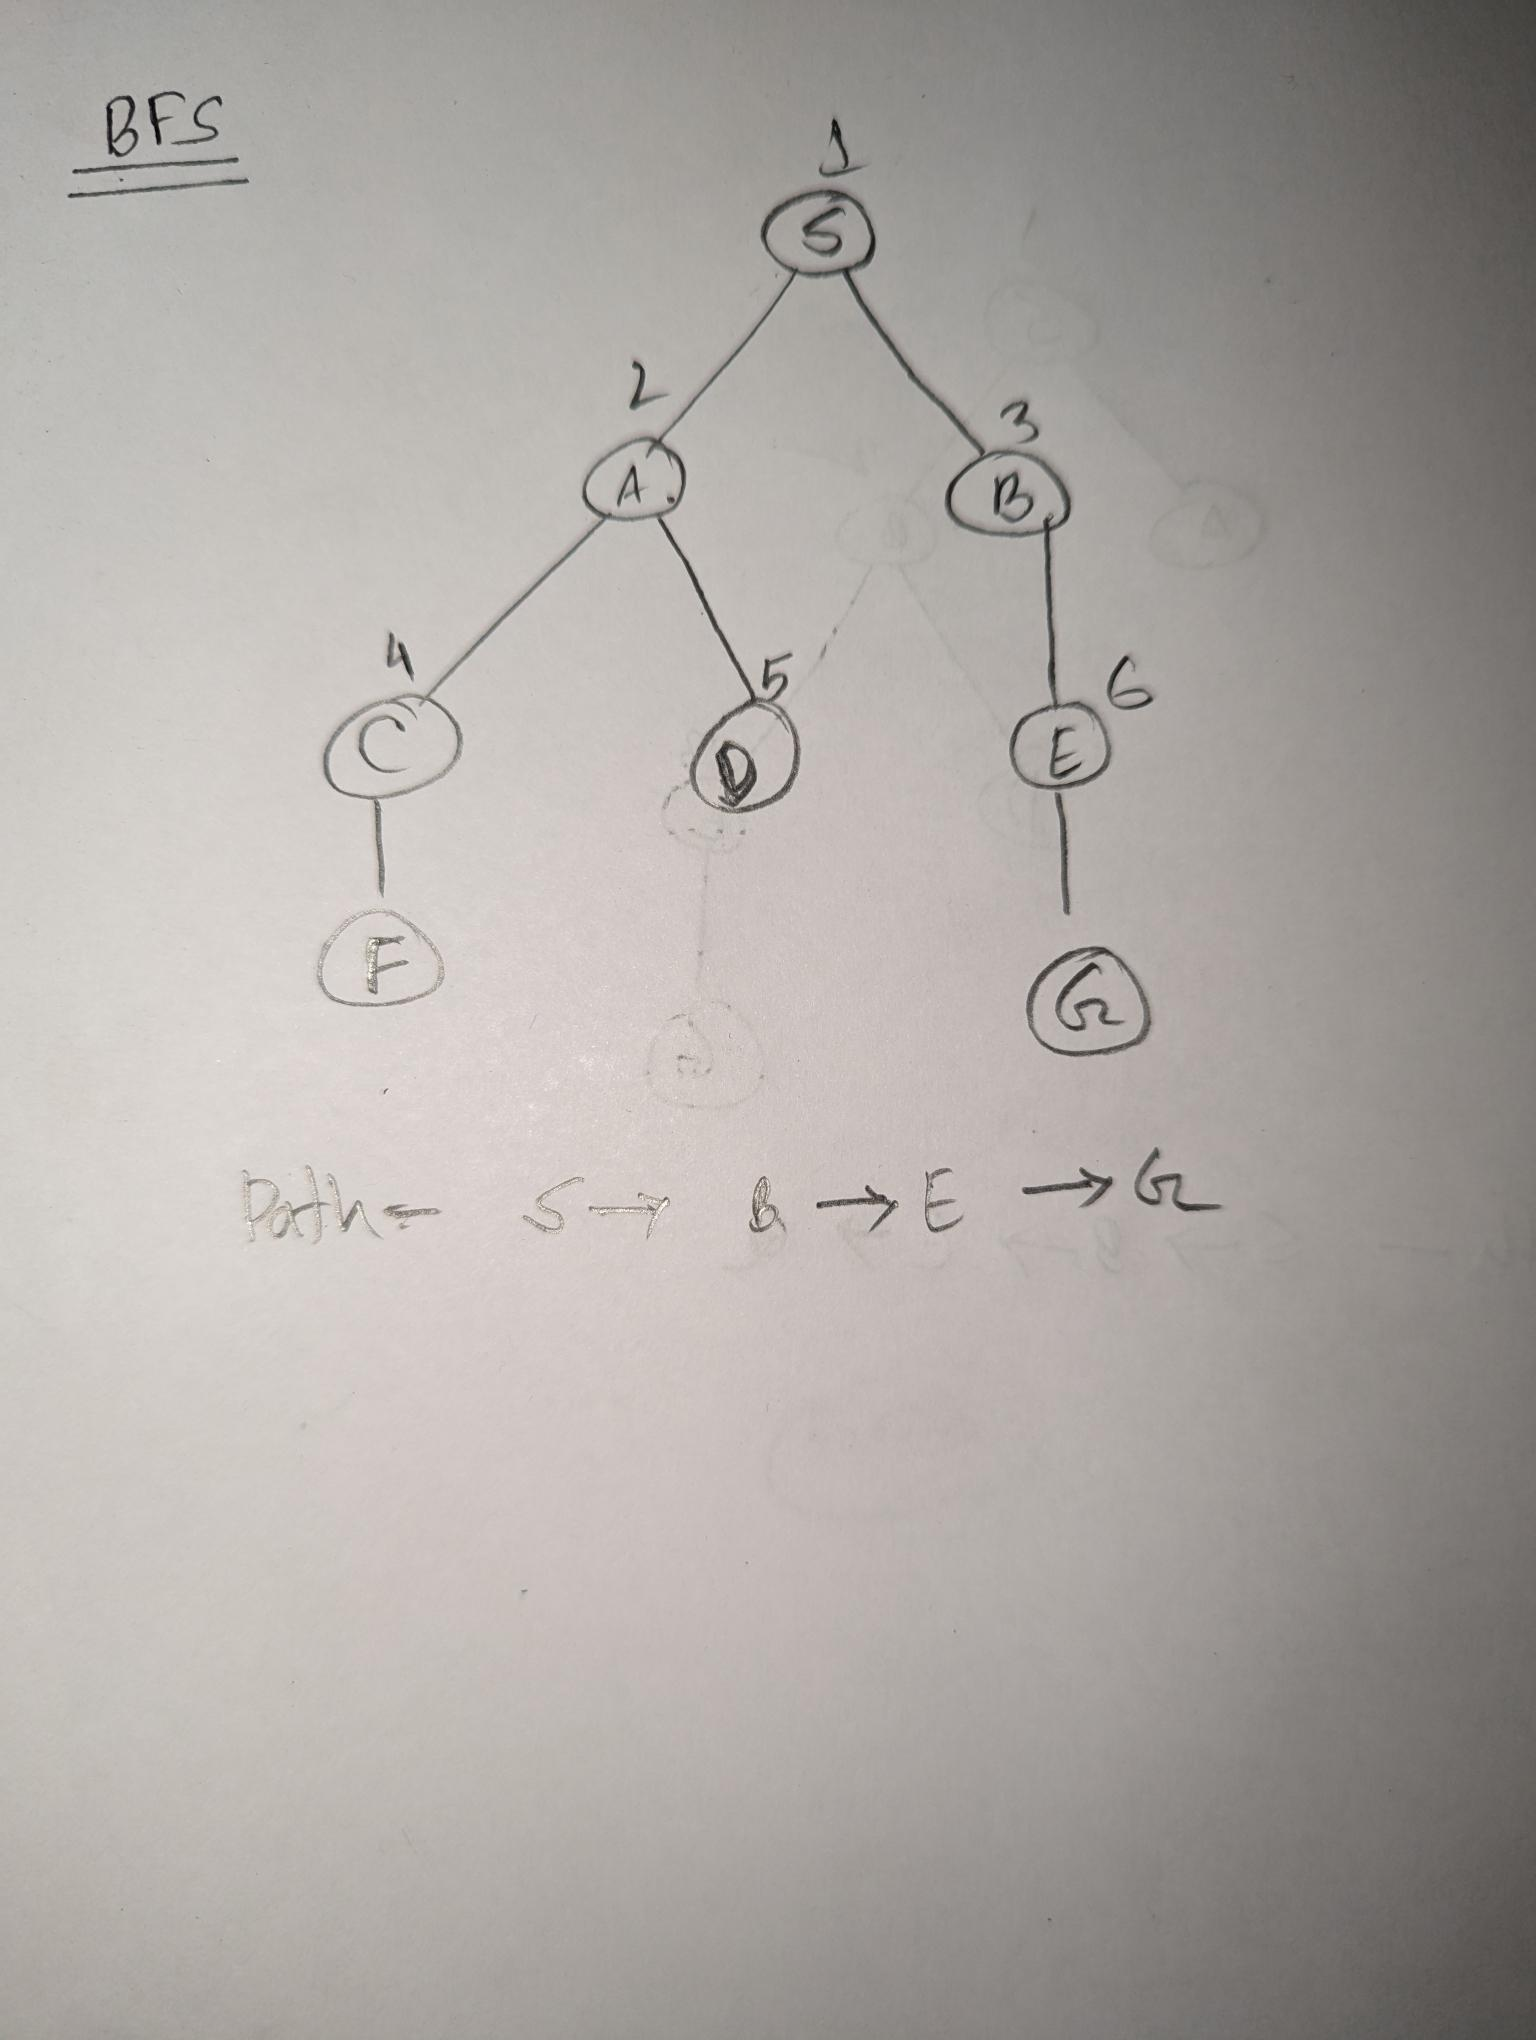

In [16]:
#map for above graph
map = {
    'A':{'B':2,'C':3, 'D':4},
    'B':{'D':3,'E':3},
    'C':{'B':4,'F':5},
    'D':{'F':6},
    'E':{'D':6,'G':10},
    'F':{'G':5},
    'G':{},
    'S':{'A':1,'B':5}
}

In [19]:
# call DFS here for the above graph
dfs('S', 'G', map)

***Frontier: S - ***
Expanding: S
A generated.
B generated.
***Frontier: A - B - ***
Expanding: B
D generated.
E generated.
***Frontier: A - D - E - ***
Expanding: E
G generated.
***Frontier: A - D - G - ***
Goal satisfied


{'Name': 'G', 'Path cost': 18, 'Path': ['S', 'B', 'E', 'G']}

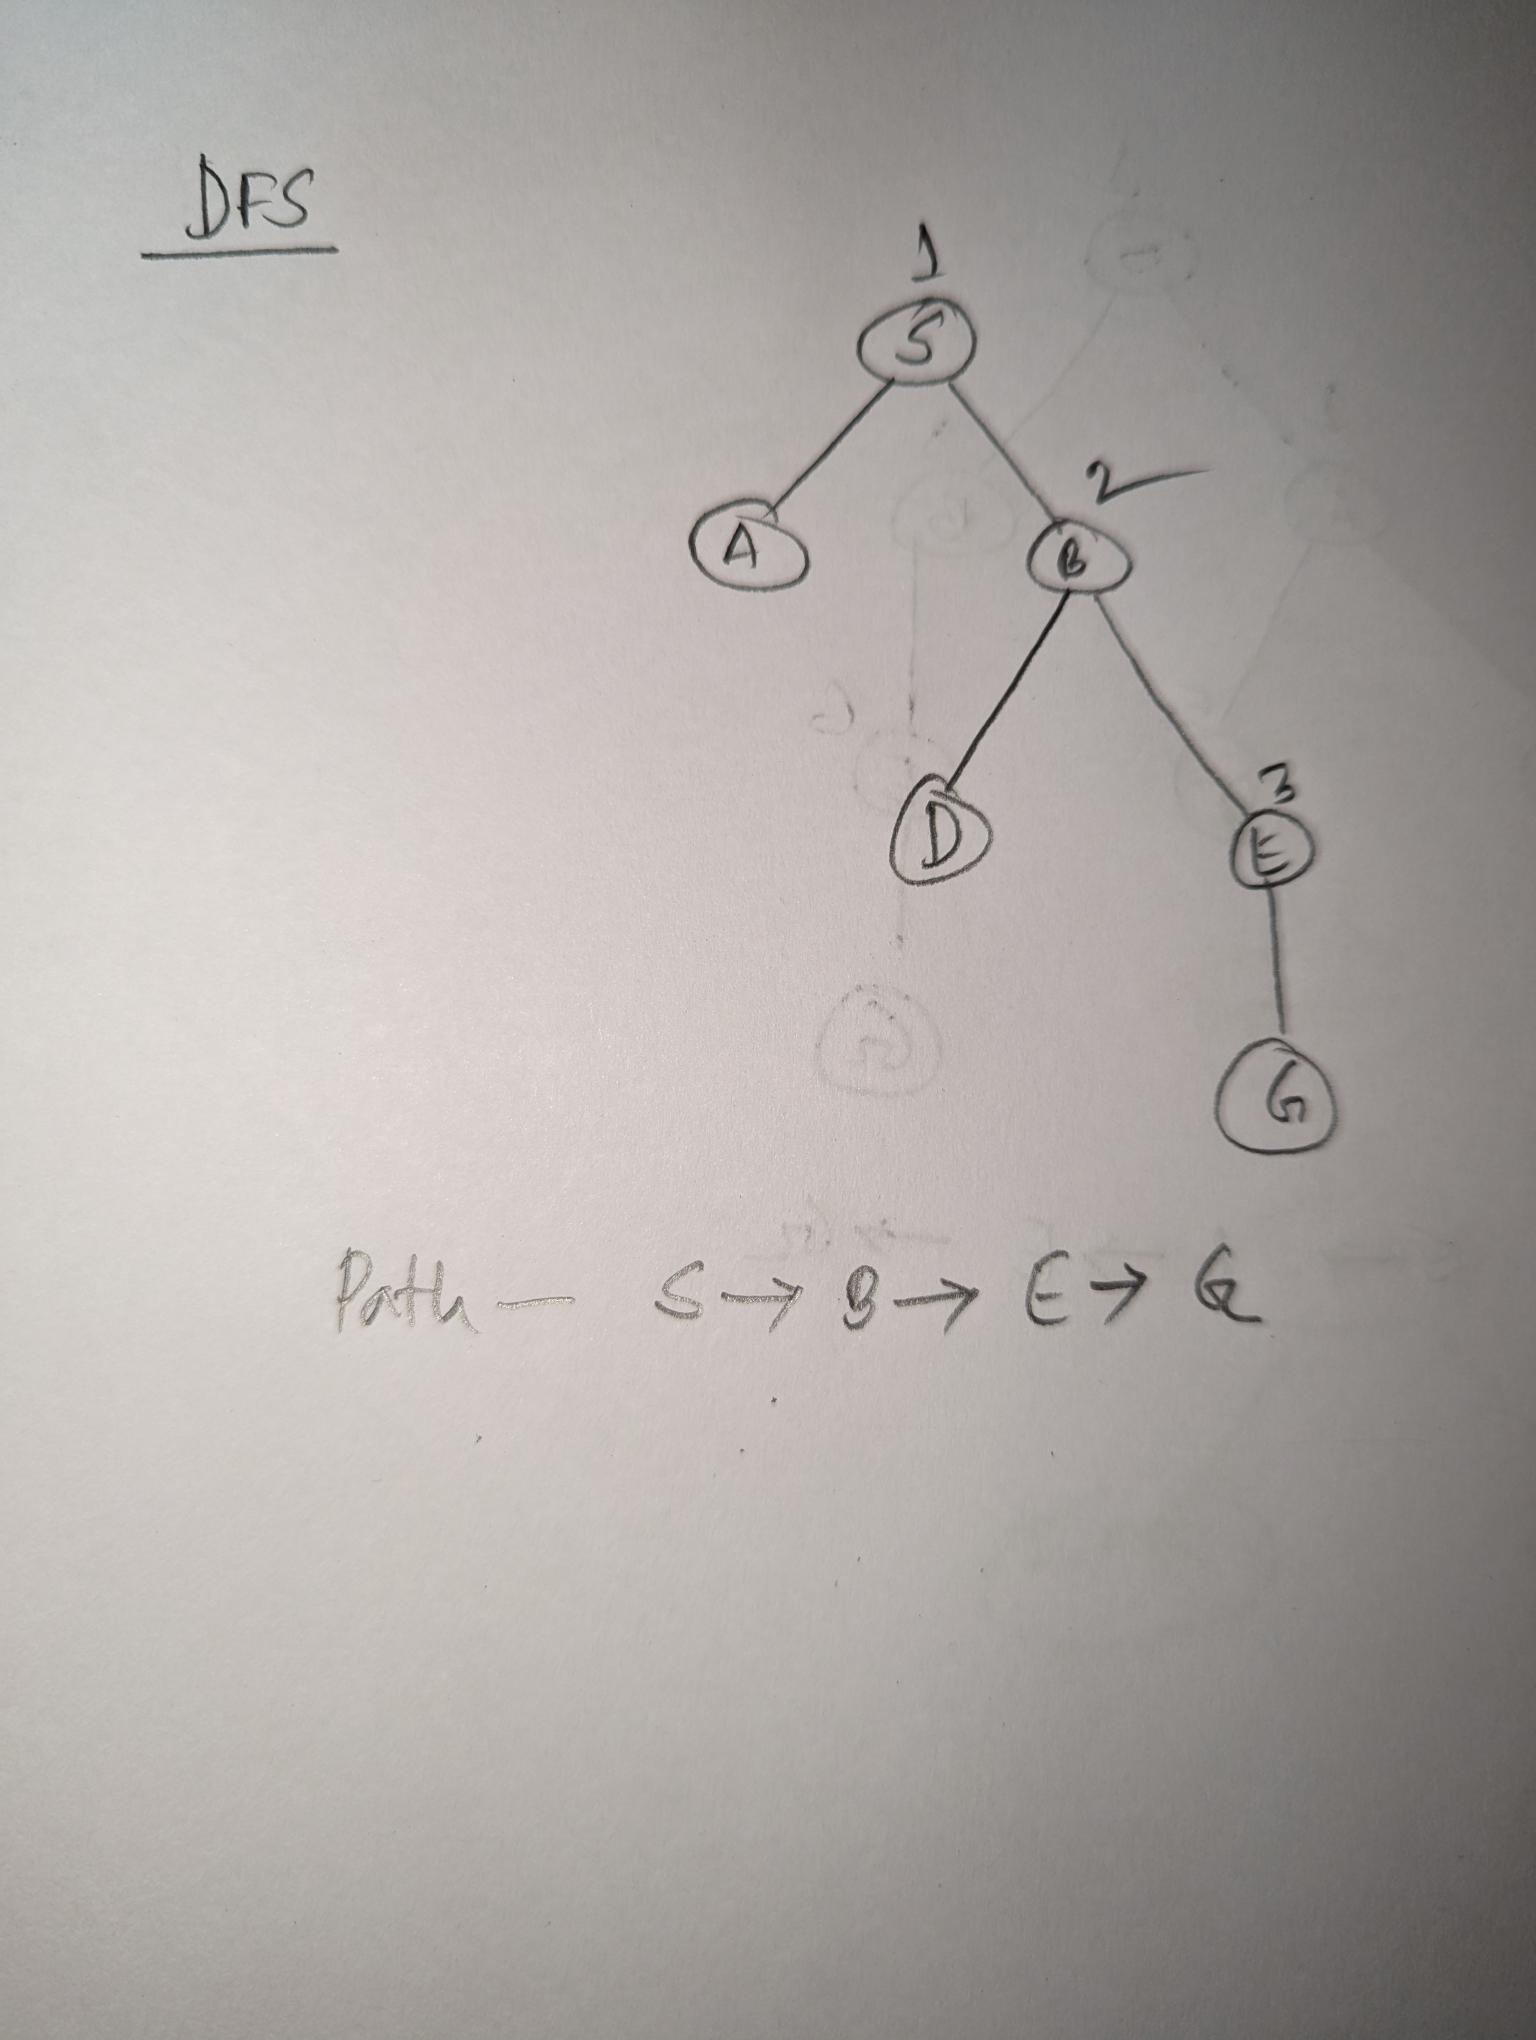

# New Exercise